In [8]:
#HackBio Internship

In [9]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=75e38f6095291f3754466ef96944b220ecb3ed431e9f4ef8a7e5ab2c0383f362
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [10]:
#import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


In [11]:
#Target search for Histone Deactylase 4
my_target = new_client.target
my_target_query = my_target.search('Histone deacetylase 4')
my_targets = pd.DataFrame.from_dict(my_target_query)
my_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Histone deacetylase,27.0,False,CHEMBL2095943,"[{'accession': 'Q6P6W3', 'component_descriptio...",PROTEIN FAMILY,10116.0
1,"[{'xref_id': 'P56524', 'xref_name': None, 'xre...",Homo sapiens,Histone deacetylase 4,26.0,False,CHEMBL3524,"[{'accession': 'P56524', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Homo sapiens,Histone deacetylase,26.0,False,CHEMBL2093865,"[{'accession': 'Q13547', 'component_descriptio...",PROTEIN FAMILY,9606.0
3,[],Homo sapiens,Cereblon/Histone deacetylase 4,26.0,False,CHEMBL4296127,"[{'accession': 'P56524', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
4,[],Homo sapiens,VHL/Histone deacetylase 4,26.0,False,CHEMBL4630746,"[{'accession': 'P56524', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
...,...,...,...,...,...,...,...,...,...
1385,[],Homo sapiens,UDP-glucuronosyltransferases (UGTs),1.0,False,CHEMBL4523985,"[{'accession': 'P22310', 'component_descriptio...",PROTEIN FAMILY,9606.0
1386,[],Homo sapiens,NEK kinase,1.0,False,CHEMBL4524130,"[{'accession': 'P51955', 'component_descriptio...",PROTEIN FAMILY,9606.0
1387,[],Human coronavirus 229E,Replicase polyprotein 1ab,1.0,False,CHEMBL4888440,"[{'accession': 'P0C6X1', 'component_descriptio...",SINGLE PROTEIN,11137.0
1388,[],Homo sapiens,Sodium channel alpha subunit,0.0,False,CHEMBL2331043,"[{'accession': 'P35498', 'component_descriptio...",PROTEIN FAMILY,9606.0


In [12]:
#select and retrieve biactivity data for target
selected_target = my_targets.target_chembl_id[1]
selected_target

'CHEMBL3524'

In [13]:
# Retrieve only bioactivity data for Histone Deactylase 4
activity = new_client.activity
data = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [14]:
df = pd.DataFrame.from_dict(data)

In [15]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,157539,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,110000.0
1,None,None,167392,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,510.0
2,None,None,180808,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,25.0
3,None,None,717472,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,510.0
4,None,None,721910,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,2.7


In [16]:
#Handling missing data
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-16-67cfb582c1f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,157539,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,110000.0
1,None,None,167392,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,510.0
2,None,None,180808,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,25.0
3,None,None,717472,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,510.0
4,None,None,721910,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,None,None,25072417,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,10.0
1629,None,None,25072418,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,30.0
1630,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072419,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,0.655
1631,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25095099,[],CHEMBL5259788,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,15.47


In [17]:
len(df2.canonical_smiles.unique())

1121

In [18]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,157539,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,110000.0
1,None,None,167392,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,510.0
2,None,None,180808,[],CHEMBL698806,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,25.0
4,None,None,721910,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,2.7
5,None,None,741584,[],CHEMBL698808,Inhibition of Histone deacetylase 4 in mammali...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,nM,UO_0000065,None,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25057991,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5249395,Inhibition of recombinant HDAC4 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,1700.0
1622,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072411,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,0.5
1624,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072413,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,0.67
1630,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072419,[],CHEMBL5253340,Inhibition of HDAC4 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Histone deacetylase 4,9606,None,None,IC50,uM,UO_0000065,None,0.655


In [19]:
#Data pre-processing of the bioactivity data


In [20]:
#print the entire column title
columns_list = df2_nr.columns.tolist()

print(columns_list)

['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']


In [21]:
#Table of selected bioactivity data of interest
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,110000.0
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,510.0
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,25.0
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,2.7
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,0.3
...,...,...,...
1621,CHEMBL5280060,O=C(CCCCCCNC(=O)C(O)(O)C(F)(F)F)Nc1ncc(-c2ccc(...,1700000.0
1622,CHEMBL5274004,CN(CCc1ccccc1)S(=O)(=O)c1cccc(/C=C/C(=O)NO)c1,500.0
1624,CHEMBL5271192,CN(C)c1cccc2c(SNCCCCCC(=O)NO)cccc12,670.0
1630,CHEMBL5288006,[11CH3]n1cc(CCNCc2ccc(/C=C/C(=O)NO)cc2)c2ccccc21,655.0


Labeling compunds as either being acive, inactive or intermediate

In [22]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [23]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,110000.0
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,510.0
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,25.0
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,2.7
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,0.3


In [24]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,110000.0,inactive
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,510.0,active
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,25.0,active
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,2.7,active
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,0.3,active


Calculate Lipinski descriptors


In [25]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [26]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# Addition of Lipinski Descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [27]:
#Run lipinski using canonical_smiles
df_lipinski = lipinski(df4.canonical_smiles)

In [28]:
#View lipinski Descriptors
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,569.790,2.8512,3.0,8.0
1,540.708,1.4296,4.0,8.0
2,542.724,0.8942,6.0,8.0
3,425.486,-1.0589,5.0,6.0
4,436.509,-0.5964,3.0,6.0


In [29]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,110000.0,inactive
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,510.0,active
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,25.0,active
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,2.7,active
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,0.3,active


In [30]:
#Combine df4 table with lipinski value table
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [31]:
#View new combined table
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,110000.0,inactive,569.790,2.8512,3.0,8.0
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,510.0,active,540.708,1.4296,4.0,8.0
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,25.0,active,542.724,0.8942,6.0,8.0
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,2.7,active,436.509,-0.5964,3.0,6.0
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,0.3,active,302.374,2.5793,2.0,4.0


In [32]:
#Describe combines table with standard value
df_combined.standard_value.describe()

,standard_value
count,1121
unique,481
top,50000.0
freq,108


Convert IC50 to pIC50

In [33]:
#Import library
import numpy as np
#convert IC50 to pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x

In [34]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,inactive,569.790000,2.8512,3.0,8.0,3.958607
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,active,540.708000,1.4296,4.0,8.0,6.292430
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,active,542.724000,0.8942,6.0,8.0,7.602060
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,active,436.509000,-0.5964,3.0,6.0,8.568636
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,active,302.374000,2.5793,2.0,4.0,9.522879
...,...,...,...,...,...,...,...,...
1113,NaN,NaN,inactive,441.244000,2.6975,4.0,4.0,NaN
1115,NaN,NaN,inactive,475.489000,3.0671,4.0,7.0,NaN
1116,NaN,NaN,inactive,524.359000,3.8210,4.0,6.0,NaN
1119,NaN,NaN,active,348.434434,3.0292,3.0,4.0,NaN


In [35]:
#Describe the pIC50 column
df_final.pIC50.describe()

,pIC50
count,1121.000000
mean,5.668200
std,1.343100
min,2.568636
25%,4.481486
50%,5.494850
75%,6.552842
max,12.000000


Chemical Space Analysis

In [36]:
#Import Library for Data Expoloration
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

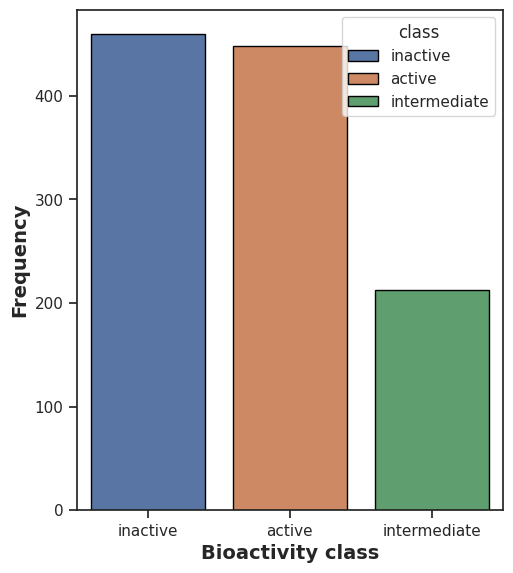

In [37]:
#Plot graph for bioactivity class
plt.figure(figsize=(5.5, 6.5))

sns.countplot(x='class', data=df_final, edgecolor='black', hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('pfht1_plot_bioactivity_class.pdf')

Scatter plot of MV versus LogP

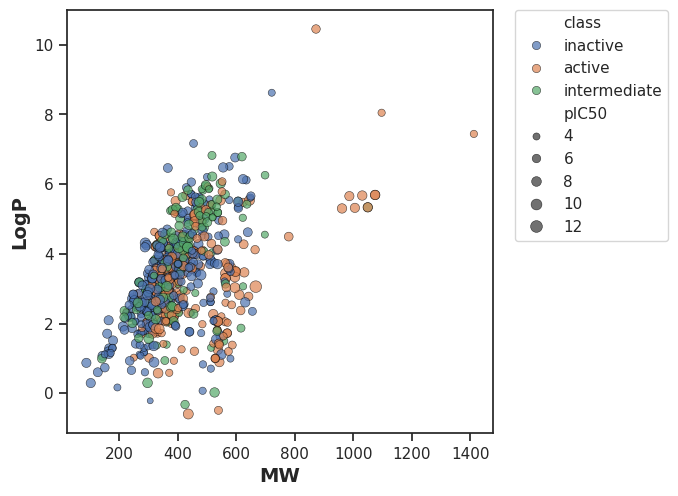

In [38]:
#Scatter Plot for MV vs LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [39]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,inactive,569.790000,2.8512,3.0,8.0,3.958607
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,active,540.708000,1.4296,4.0,8.0,6.292430
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,active,542.724000,0.8942,6.0,8.0,7.602060
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,active,436.509000,-0.5964,3.0,6.0,8.568636
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,active,302.374000,2.5793,2.0,4.0,9.522879
...,...,...,...,...,...,...,...,...
1113,NaN,NaN,inactive,441.244000,2.6975,4.0,4.0,NaN
1115,NaN,NaN,inactive,475.489000,3.0671,4.0,7.0,NaN
1116,NaN,NaN,inactive,524.359000,3.8210,4.0,6.0,NaN
1119,NaN,NaN,active,348.434434,3.0292,3.0,4.0,NaN


In [40]:
#Remove NaN
df_cleaned = df_final.dropna()

df_cleaned

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,inactive,569.790,2.8512,3.0,8.0,3.958607
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,active,540.708,1.4296,4.0,8.0,6.292430
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,active,542.724,0.8942,6.0,8.0,7.602060
4,CHEMBL145110,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2C...,active,436.509,-0.5964,3.0,6.0,8.568636
5,CHEMBL144205,C[C@@H]1NC(=O)[C@H](CCCCCC(=O)C2CO2)NC(=O)[C@H...,active,302.374,2.5793,2.0,4.0,9.522879
...,...,...,...,...,...,...,...,...
1108,CHEMBL4474656,CN(C)c1ccc(C(=O)N(CC(=O)NCc2ccccc2)Cc2ccc(C(=O...,inactive,445.463,3.0585,4.0,6.0,5.000000
1109,CHEMBL4587363,Cc1cc(C)cc(C(=O)N(CC(=O)NCc2ccccc2)Cc2ccc(C(=O...,inactive,419.425,2.5447,4.0,6.0,5.000000
1114,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,inactive,438.446,3.6020,4.0,4.0,5.000000
1117,CHEMBL4456886,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1ccc(...,active,360.435,2.0684,2.0,4.0,4.000000


In [41]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [42]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

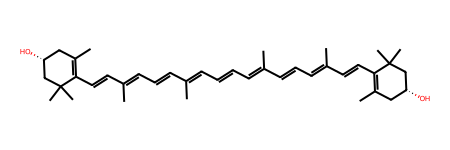

In [43]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Zeaxanthin=Chem.MolFromSmiles('CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C(/C=C/C=C(/C=C/C2=C(C[C@H](CC2(C)C)O)C)\C)\C)/C)/C')
Zeaxanthin

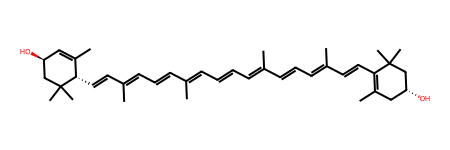

In [44]:
Lutein=Chem.MolFromSmiles('CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C(\C)/C=C/C=C(\C)/C=C/[C@H]2C(=C[C@@H](CC2(C)C)O)C)/C)/C')
Lutein

In [45]:
#generate a dataframe with ligand and smiles column

ligand_smiles_df = pd.DataFrame({'Ligand': ['Zeaxanthin', 'Lutein'],
                                'Smiles': ['CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C(/C=C/C=C(/C=C/C2=C(C[C@H](CC2(C)C)O)C)\C)\C)/C)/C',
                                        'CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C(\C)/C=C/C=C(\C)/C=C/[C@H]2C(=C[C@@H](CC2(C)C)O)C)/C)/C']})
print(ligand_smiles_df)


       Ligand                                             Smiles
0  Zeaxanthin  CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C...
1      Lutein  CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C...


In [46]:
# Run Lipinski on the new DataFrame
ligand_lipinski = lipinski(ligand_smiles_df.Smiles)
ligand_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,568.886,10.5474,2.0,2.0
1,568.886,10.4033,2.0,2.0


Calculate descriptors using RDkit

In [47]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [48]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])

In [49]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15.041281,-6.173837,15.041281,1.097467,0.176093,569.790,526.446,569.259328,214,0,...,2,0,0,0,0,0,0,0,0,0
1,14.792593,-5.714428,14.792593,1.035480,0.178339,540.708,504.420,540.207627,200,0,...,0,0,0,0,0,0,0,0,0,0
2,14.706277,-5.798286,14.706277,0.938780,0.127429,542.724,504.420,542.223277,202,0,...,0,0,0,0,0,0,0,0,0,0
3,14.435608,-5.700332,14.435608,1.163463,0.207404,425.486,394.238,425.227434,168,0,...,0,0,0,0,0,0,0,0,0,0
4,14.493571,-5.726113,14.493571,1.512369,0.360144,436.509,404.253,436.232185,172,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,14.875056,-4.851827,14.875056,0.452783,0.258455,535.648,502.384,535.258340,204,0,...,0,0,0,0,0,0,0,0,0,0
773,15.099401,-4.937668,15.099401,0.528013,0.154942,596.731,560.443,596.278741,226,0,...,0,0,0,0,0,0,0,0,0,0
774,13.939030,-4.694369,13.939030,0.031602,0.263241,470.595,440.355,470.198776,176,0,...,0,0,0,0,0,0,0,1,0,0
775,15.953684,-5.835442,15.953684,0.530766,0.156538,650.629,603.253,650.363951,252,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [51]:
#View Table after concatenate
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,15.041281,-6.173837,15.041281,1.097467,0.176093,569.790,526.446,569.259328,214.0,0.0,...,0.0,0.0,0.0,0.0,0.0,569.790,2.8512,3.0,8.0,3.958607
1,14.792593,-5.714428,14.792593,1.035480,0.178339,540.708,504.420,540.207627,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,540.708,1.4296,4.0,8.0,6.292430
2,14.706277,-5.798286,14.706277,0.938780,0.127429,542.724,504.420,542.223277,202.0,0.0,...,0.0,0.0,0.0,0.0,0.0,542.724,0.8942,6.0,8.0,7.602060
3,14.435608,-5.700332,14.435608,1.163463,0.207404,425.486,394.238,425.227434,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,425.486,-1.0589,5.0,6.0,NaN
4,14.493571,-5.726113,14.493571,1.512369,0.360144,436.509,404.253,436.232185,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,436.509,-0.5964,3.0,6.0,8.568636


In [52]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [53]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,15.041281,-6.173837,15.041281,1.097467,0.176093,569.790,526.446,569.259328,214.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8512,3.0,8.0,3.958607
1,14.792593,-5.714428,14.792593,1.035480,0.178339,540.708,504.420,540.207627,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.4296,4.0,8.0,6.292430
2,14.706277,-5.798286,14.706277,0.938780,0.127429,542.724,504.420,542.223277,202.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8942,6.0,8.0,7.602060
3,14.435608,-5.700332,14.435608,1.163463,0.207404,425.486,394.238,425.227434,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0589,5.0,6.0,NaN
4,14.493571,-5.726113,14.493571,1.512369,0.360144,436.509,404.253,436.232185,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.5964,3.0,6.0,8.568636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.769551
1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.301030
1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.173925
1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.183759


In [54]:
# Drop NaN
fp_pIC = fp_pIC.dropna()

In [55]:
ligand =RDkit_descriptors(ligand_smiles_df["Smiles"])
ligand = pd.DataFrame(ligand[0], columns=ligand[1])
ligand

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.976566,-4.870485,8.976566,2.121484,0.257357,568.886,512.438,568.428031,228,0,...,0,0,0,0,0,0,0,0,0,0
1,9.451184,-5.059026,9.451184,2.124857,0.203230,568.886,512.438,568.428031,228,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# prompt: concatenate ligans, ligand_lipinski and ligand_smiles_df

ligand_combined = pd.concat([ligand_smiles_df, ligand_lipinski,ligand], axis=1)
ligand_combined


,Ligand,Smiles,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zeaxanthin,CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C...,568.886,10.5474,2.0,2.0,8.976566,-4.870485,8.976566,2.121484,...,0,0,0,0,0,0,0,0,0,0
1,Lutein,CC1=C(C(C[C@@H](C1)O)(C)C)/C=C/C(=C/C=C/C(=C/C...,568.886,10.4033,2.0,2.0,9.451184,-5.059026,9.451184,2.124857,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#remove smiles column
ligand_combined = ligand_combined.drop('Smiles', axis=1)
ligand_combined

,Ligand,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zeaxanthin,568.886,10.5474,2.0,2.0,8.976566,-4.870485,8.976566,2.121484,0.257357,...,0,0,0,0,0,0,0,0,0,0
1,Lutein,568.886,10.4033,2.0,2.0,9.451184,-5.059026,9.451184,2.124857,0.203230,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#remove MW column due to duplication
ligand_combined = ligand_combined.drop('MW', axis=1)
ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zeaxanthin,10.5474,2.0,2.0,8.976566,-4.870485,8.976566,2.121484,0.257357,568.886,...,0,0,0,0,0,0,0,0,0,0
1,Lutein,10.4033,2.0,2.0,9.451184,-5.059026,9.451184,2.124857,0.203230,568.886,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#add pIC50 column
df_ligand_combined = pd.concat([ligand_combined, df_cleaned['pIC50']], axis=1)
df_ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Zeaxanthin,10.5474,2.0,2.0,8.976566,-4.870485,8.976566,2.121484,0.257357,568.886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.958607
1,Lutein,10.4033,2.0,2.0,9.451184,-5.059026,9.451184,2.124857,0.203230,568.886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.292430
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.602060
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.568636
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
1117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [60]:
#drop NaN
df_ligand_combined = df_ligand_combined.dropna()
df_ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Zeaxanthin,10.5474,2.0,2.0,8.976566,-4.870485,8.976566,2.121484,0.257357,568.886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.958607
1,Lutein,10.4033,2.0,2.0,9.451184,-5.059026,9.451184,2.124857,0.203230,568.886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.292430


In [61]:
#create final ligand table without Ipc and ligand columns (cleaning for modeling)

# Remove 'Ligand' and 'pIC50' columns
final_ligand_table = df_ligand_combined.drop(['Ligand', 'Ipc'], axis=1)

# Display the final ligand table
print(final_ligand_table)


      LogP  NumHDonors  NumHAcceptors  MaxEStateIndex  MinEStateIndex  \
0  10.5474         2.0            2.0        8.976566       -4.870485   
1  10.4033         2.0            2.0        9.451184       -5.059026   

   MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0           8.976566           2.121484  0.257357  568.886         512.438   
1           9.451184           2.124857  0.203230  568.886         512.438   

   ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0.0         0.0                0.0           0.0   
1  ...           0.0         0.0                0.0           0.0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea     pIC50  
0          0.0          0.0           0.0               0.0      0.0  3.958607  
1          0.0          0.0           0.0               0.0      0.0  6.292430  

[2 rows x 211 columns]


Model Training Sets

In [62]:
#Library for Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [89]:
#define X and Y
X= fp_pIC.drop(columns=['pIC50'])
Y=fp_pIC.pIC50

In [90]:
#Slipt the data into trainig(80%) and testing sets(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [91]:
#remove Ipc column from X_train, X_test, Y_train, Y_test

if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)
if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)


In [92]:
#Print the shapes of the training and testing sets to confirm
print(f"Training set size: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training set size: X_train: (399, 210), Y_train: (399,)
Testing set size: X_test: (100, 210), Y_test: (100,)


In [93]:
Model= RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Predictions on the test set (effects of the model on the data)
y_pred = Model.predict(X_test)
y_pred

array([4.85661319, 6.53092287, 5.27828731, 5.36969569, 4.13367033,
       6.15087877, 6.59210501, 6.22586645, 5.15027044, 6.6327    ,
       6.62455054, 6.24085937, 5.31461411, 7.12959459, 6.33218753,
       4.94743492, 6.16522315, 7.16774789, 5.64705713, 5.07881082,
       4.72895954, 5.05710529, 4.82862936, 6.3264897 , 4.82473649,
       5.32917968, 4.57993647, 4.56134378, 6.43221071, 5.80731846,
       5.57827318, 6.52832915, 7.73081049, 6.2176173 , 5.08617373,
       7.04952899, 5.07118521, 5.36817961, 5.46391912, 5.0944603 ,
       7.52418315, 5.43232924, 7.72645994, 4.61396041, 6.34694662,
       5.31165069, 5.61898656, 5.61025644, 5.78205623, 5.05061562,
       4.79846471, 4.91362494, 4.67322687, 4.59572249, 5.73406642,
       5.54571764, 4.81517112, 6.28342918, 5.9301955 , 3.67807312,
       6.06833541, 7.10252214, 4.41765732, 5.19536383, 5.57710077,
       6.14925367, 5.94920241, 6.65247548, 4.8760399 , 5.50885145,
       4.78676914, 5.03823524, 4.99244837, 6.12689202, 4.70646

Ligand Prediction


In [95]:
#define X and Y
X_LIGAND= final_ligand_table.drop(columns=['pIC50'])
Y_LIGAND=final_ligand_table.pIC50

In [96]:
Model.fit(X_LIGAND, Y_LIGAND)

RandomForestRegressor(random_state=42)

In [97]:
#pIC50 prediction of ligands
ligand_prediction = Model.predict(X_LIGAND)
ligand_prediction

array([4.47204827, 5.68563597])

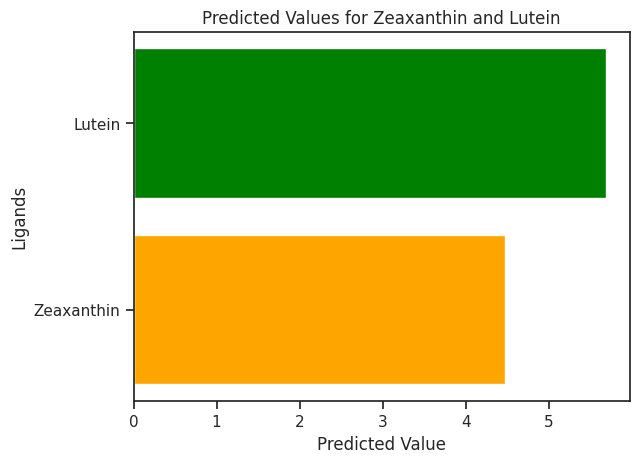

In [72]:
import matplotlib.pyplot as plt

ligands = ['Zeaxanthin', 'Lutein']
predicted_values = [4.47204827, 5.68563597]

plt.barh(ligands, predicted_values, color=['orange', 'green'])
plt.title('Predicted Values for Zeaxanthin and Lutein')
plt.xlabel('Predicted Value')
plt.ylabel('Ligands')
plt.show()

Model Evaluation

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [100]:
print(f"MSE: {mse}, MAE: {mae}, R-squared: {r2}")

MSE: 1.434448392089781, MAE: 0.9173858303675583, R-squared: 0.2674666489747807


In [101]:
mse_LIGAND = mean_squared_error(Y_LIGAND, ligand_prediction)
mae_LIGAND = mean_absolute_error(Y_LIGAND, ligand_prediction)
r2_LIGAND = r2_score(Y_LIGAND, ligand_prediction)


In [102]:
print(f"MSE_Ligand: {mse_LIGAND}, MAE_Ligand: {mae_LIGAND}, R-squared_Ligand: {r2_LIGAND}")

MSE_Ligand: 0.3159101952201985, MAE_Ligand: 0.560117402174473, R-squared_Ligand: 0.7679999999999972


Cross-validation (k-fold cross validation,k=5 or k=10) to ensure the model generalises well to unseen data


In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)

In [105]:
if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)

In [106]:
# remove Ipc from X and Y and Model

if 'Ipc' in X.columns:
  X = X.drop('Ipc', axis=1)

# Y is a series, so we don't need to remove a column.
# If you meant to remove rows with NaN in Y, you can use:
# Y = Y.dropna()

# Refit the model without Ipc
Model = RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [107]:
 # prompt: cross validation of model

cv_scores = cross_val_score(Model, X, Y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [-0.52565608 -0.15397229 -0.51313287 -3.09446009 -0.24337113]
Mean cross-validation score: -0.906118493479025
